In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_path = r'C:\Users\DucTRung\Desktop\data_set\airbnb_singapore'

In [3]:
df = pd.read_csv(data_path+'\\listings.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [5]:
# Choose Model: K-means Clustering
from sklearn.cluster import KMeans

In [6]:
# Data set
X = df[['latitude', 'longitude']]

In [7]:
def group(data):
    if data == 'Central Region':
        return 0
    elif data == 'West Region':
        return 1
    elif data == 'East Region':
        return 2
    elif data == 'North-East Region':
        return 3
    elif data == 'North Region':
        return 4

In [8]:
y = df['neighbourhood_group'].apply(group)

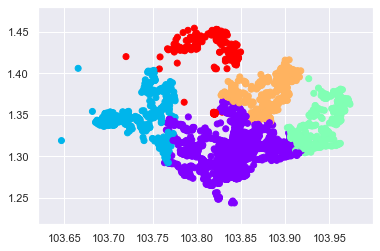

In [9]:
plt.scatter(X['longitude'], X['latitude'], c=y, cmap='rainbow')

In [10]:
# Set hyperparameter
model = KMeans(n_clusters=5)

In [11]:
# Fitting
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# Predicting
cluster = model.fit_predict(X)

In [13]:
data_cluster = df[['latitude', 'longitude', 'neighbourhood_group']]

In [14]:
data_cluster['cluster'] = cluster

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
data_cluster

,latitude,longitude,neighbourhood_group,cluster
0,1.44255,103.79580,North Region,4
1,1.33235,103.78521,Central Region,0
2,1.44246,103.79667,North Region,4
3,1.34541,103.95712,East Region,3
4,1.34567,103.95963,East Region,3
...,...,...,...,...
7902,1.27973,103.78751,Central Region,2
7903,1.29269,103.82623,Central Region,2
7904,1.31286,103.85996,Central Region,1
7905,1.29543,103.83801,Central Region,2


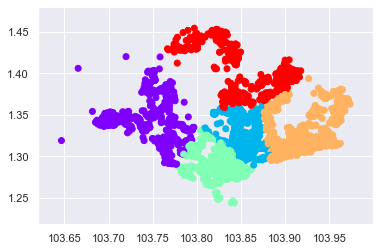

In [16]:
plt.scatter(X['longitude'], X['latitude'], c=data_cluster['cluster'], cmap='rainbow')

In [18]:
X['region'] = y

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
X

,latitude,longitude,region
0,1.44255,103.79580,4
1,1.33235,103.78521,0
2,1.44246,103.79667,4
3,1.34541,103.95712,2
4,1.34567,103.95963,2
...,...,...,...
7902,1.27973,103.78751,0
7903,1.29269,103.82623,0
7904,1.31286,103.85996,0
7905,1.29543,103.83801,0


In [20]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
cluster = model.predict(X)

In [25]:
data_cluster['cluster'] = cluster

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


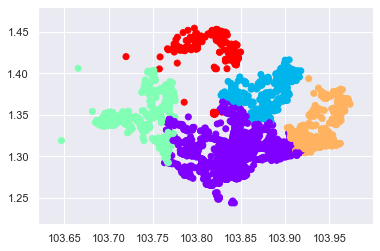

In [27]:
plt.scatter(X['longitude'], X['latitude'], c=data_cluster['cluster'], cmap='rainbow')

## Selecting the number of cluster

In [28]:
# WCSS
model.inertia_

7.27091783100728

In [35]:
wcss = []

for i, j in enumerate(range(1, 7)):
    model = KMeans(n_clusters=j)
    model.fit(X)
    model.predict(X)
    wcss.append(model.inertia_)
    print('{} cluster with WSCC = {} '.format(i+1, model.inertia_))

1 cluster with WSCC = 7501.864123565535 
2 cluster with WSCC = 1139.5653342558403 
3 cluster with WSCC = 407.67666384539507 
4 cluster with WSCC = 136.41861237938136 
5 cluster with WSCC = 7.27091783100728 
6 cluster with WSCC = 4.524545947465267 


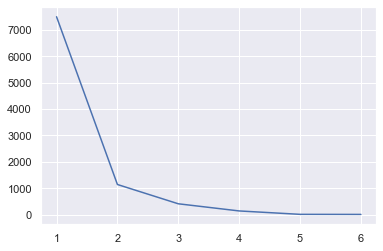

In [38]:
# Elbow Method Graph
plt.plot(range(1, 7), wcss)